In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [23]:
data = pd.read_csv("Iris.csv") 
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
print(data.head())
print(data.info())

   sepal_length  sepal_width  petal_length  petal_width      species
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.iloc[:, :-1])

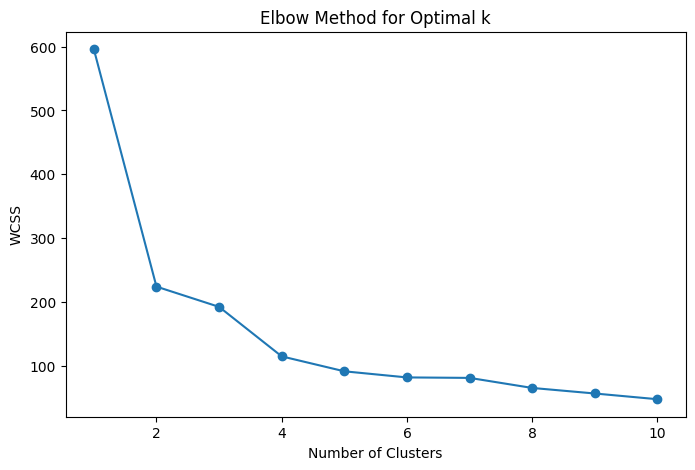

In [25]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [26]:
le = LabelEncoder()
data['target'] = le.fit_transform(data['species'])

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(scaled_features)


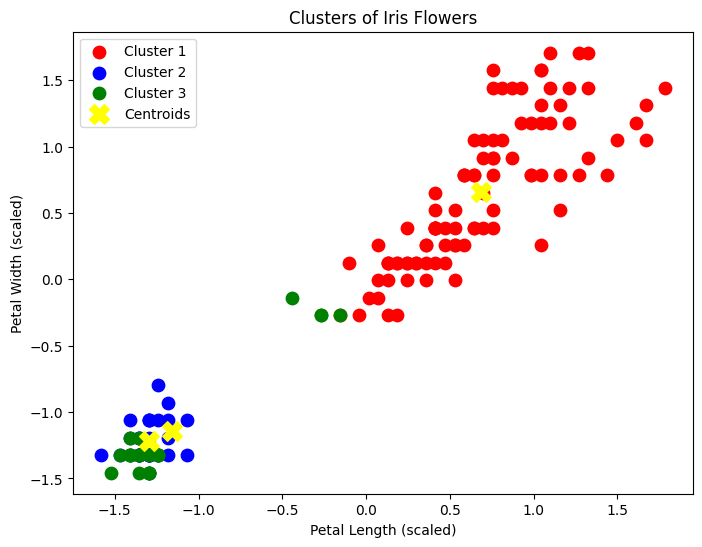

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_features[y_kmeans == 0, 2], scaled_features[y_kmeans == 0, 3], s=80, c='red', label='Cluster 1')
plt.scatter(scaled_features[y_kmeans == 1, 2], scaled_features[y_kmeans == 1, 3], s=80, c='blue', label='Cluster 2')
plt.scatter(scaled_features[y_kmeans == 2, 2], scaled_features[y_kmeans == 2, 3], s=80, c='green', label='Cluster 3')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            s=200, c='yellow', label='Centroids', marker='X')

plt.title("Clusters of Iris Flowers")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.legend()
plt.show()


In [29]:
print("Confusion Matrix:\n", confusion_matrix(data['target'], y_kmeans))
print("\nClassification Report:\n", classification_report(data['target'], y_kmeans))

Confusion Matrix:
 [[ 0 31 18]
 [46  0  4]
 [50  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      49.0
           1       0.00      0.00      0.00      50.0
           2       0.00      0.00      0.00      50.0

    accuracy                           0.00     149.0
   macro avg       0.00      0.00      0.00     149.0
weighted avg       0.00      0.00      0.00     149.0



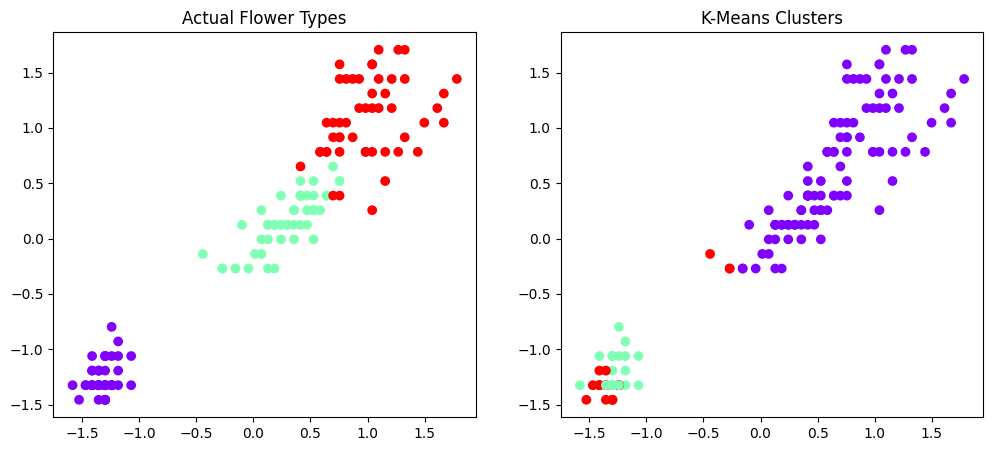

In [30]:
plt.figure(figsize=(12,5))

# Actual Labels
plt.subplot(1,2,1)
plt.scatter(scaled_features[:,2], scaled_features[:,3], c=data['target'], cmap='rainbow')
plt.title("Actual Flower Types")

# K-Means Clusters
plt.subplot(1,2,2)
plt.scatter(scaled_features[:,2], scaled_features[:,3], c=y_kmeans, cmap='rainbow')
plt.title("K-Means Clusters")
plt.show()
